In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import pandas as pn
from datetime import datetime

In [2]:
CTD = pn.read_csv("~/Desktop/NYB Indicators/cold_pool/combined.CTD.datasheets-2018-2020.csv")

In [3]:
CTD

,Unnamed: 0,CruiseID,Date,Cast,Station,Bottle.No,Lat.Start,Lat.End,Long.Start,Long.End,CTD.Depth..m.,Temp...C.
0,1,NYOS1807,0018-07-14,1,1.1,1,40.958537,40.57591,71.820132,71.49377,113.0,NaN
1,2,NYOS1807,0018-07-14,1,1.1,2,40.958537,40.57591,71.820132,71.49377,50.0,NaN
2,3,NYOS1807,0018-07-14,1,1.1,3,40.958537,40.57591,71.820132,71.49377,2.0,NaN
3,4,NYOS1807,0018-07-14,2,1.2,1,40.417600,40.41412,71.430810,71.42659,62.3,NaN
4,5,NYOS1807,0018-07-14,2,1.2,2,40.417600,40.41412,71.430810,71.42659,62.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
617,618,NYOS2002,0020-02-10,13,6.2,62,40.101940,40.10348,73.195510,73.19446,10.0,6.435
618,619,NYOS2002,0020-02-10,13,6.2,63,40.101940,40.10348,73.195510,73.19446,2.0,6.43
619,620,NYOS2002,0020-02-10,14,6.1,64,40.307320,40.31049,73.266940,73.26432,15.0,5.51
620,621,NYOS2002,0020-02-10,14,6.1,65,40.307320,40.31049,73.266940,73.26432,10.0,5.51


In [4]:
# parse multiple date formats

def try_parsing_date(text):
    for fmt in ('00%y-%m-%d', '%Y-%m-%d'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [5]:
year = np.empty(622)
month = np.empty(622)
for i in range(622):
    year[i] = try_parsing_date(str(CTD['Date'][i])).year
    month[i] = try_parsing_date(str(CTD['Date'][i])).month

In [6]:
CTD['Year'] = year
CTD['Month'] = month

In [7]:
CTD = CTD.rename(columns={'CTD.Depth..m.':'Depth','Temp...C.':'Temp'})

In [8]:
CTD

,Unnamed: 0,CruiseID,Date,Cast,Station,Bottle.No,Lat.Start,Lat.End,Long.Start,Long.End,Depth,Temp,Year,Month
0,1,NYOS1807,0018-07-14,1,1.1,1,40.958537,40.57591,71.820132,71.49377,113.0,NaN,2018.0,7.0
1,2,NYOS1807,0018-07-14,1,1.1,2,40.958537,40.57591,71.820132,71.49377,50.0,NaN,2018.0,7.0
2,3,NYOS1807,0018-07-14,1,1.1,3,40.958537,40.57591,71.820132,71.49377,2.0,NaN,2018.0,7.0
3,4,NYOS1807,0018-07-14,2,1.2,1,40.417600,40.41412,71.430810,71.42659,62.3,NaN,2018.0,7.0
4,5,NYOS1807,0018-07-14,2,1.2,2,40.417600,40.41412,71.430810,71.42659,62.3,NaN,2018.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,618,NYOS2002,0020-02-10,13,6.2,62,40.101940,40.10348,73.195510,73.19446,10.0,6.435,2020.0,2.0
618,619,NYOS2002,0020-02-10,13,6.2,63,40.101940,40.10348,73.195510,73.19446,2.0,6.43,2020.0,2.0
619,620,NYOS2002,0020-02-10,14,6.1,64,40.307320,40.31049,73.266940,73.26432,15.0,5.51,2020.0,2.0
620,621,NYOS2002,0020-02-10,14,6.1,65,40.307320,40.31049,73.266940,73.26432,10.0,5.51,2020.0,2.0


In [11]:
CTD['Temp'][CTD['Temp']=='?']=np.nan

<ipython-input-11-dac68114e812>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CTD['Temp'][CTD['Temp']=='?']=np.nan


In [ ]:
CTD['Temp'] = CTD['Temp'].astype(float)
CTD['Depth'] = CTD['Depth'].astype(float)

In [15]:
CTD2018 = CTD[CTD['Year']==2018]
CTD2018['Month'].unique()

array([7.])

In [16]:
CTD2018['Cast'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

<ipython-input-28-88a51ac9d45a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-28-88a51ac9d45a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-28-88a51ac9d45a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-28-88a51ac9d45a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-28-88a51ac9d45a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-28-88a51ac9d45a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-28-88a51ac9d45a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD

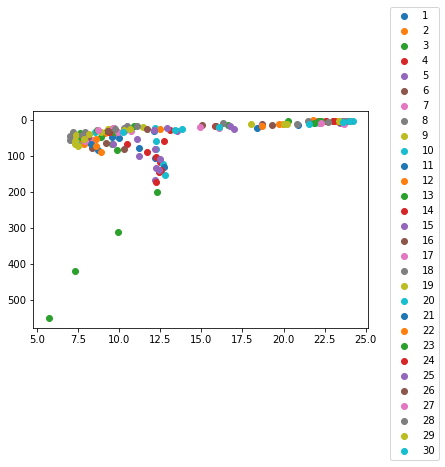

In [28]:
x=np.empty(30)
for i in CTD2018['Cast'].unique():
    ctd = CTD2018[CTD['Cast'] == i]
    plt.scatter(ctd['Temp'],ctd['Depth'])
    
plt.legend(CTD2018['Cast'].unique(),bbox_to_anchor=(1.05, 1.5), loc='upper left')
plt.gca().invert_yaxis()

In [38]:
# find the minimum temp of each cast
castmin = np.empty(30)
for i in CTD2018['Cast'].unique():
    ctd = CTD2018[CTD['Cast'] == i]
    castmin[i-1] = np.nanmin(ctd['Temp'])

<ipython-input-38-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-38-4790cf937371>:5: RuntimeWarning: All-NaN axis encountered
  castmin[i-1] = np.nanmin(ctd['Temp'])
<ipython-input-38-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-38-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-38-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-38-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-38-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input

In [37]:
castmin
#only look at profiles where the temperature went below 10C

array([    nan,  9.13  ,  8.87  , 11.7   ,  9.601 ,  7.9717,  8.33  ,
        9.7   ,  8.917 ,  7.5859,  8.31  ,  7.76  ,  7.64  ,  9.32  ,
       12.0979,  9.65  ,  8.7   ,  7.    ,  7.3   , 12.25  , 10.    ,
        8.6   ,  5.7   ,  9.39  , 11.1   ,  8.1   ,  7.9   ,  7.712 ,
        7.3039, 10.243 ])

In [ ]:
for i in CTD2018['Cast'].unique():
    ctd = CTD2018[CTD['Cast'] == i]
    plt.scatter(np.float(ctd[]),ctd['CTD.Depth..m.'])

In [ ]:
np.float(CTD2018['Temp...C.'][167])